In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("audi.csv")


In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [34]:
df_encoded = pd.get_dummies(df, columns=["model"], drop_first=True)




In [35]:
df

,model,year,price,mileage,tax,mpg,engineSize
0,A1,2017,12500,15735,150,55.4,1.4
1,A6,2016,16500,36203,20,64.2,2.0
2,A1,2016,11000,29946,30,55.4,1.4
3,A4,2017,16800,25952,145,67.3,2.0
4,A3,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...,...
10663,A3,2020,16999,4018,145,49.6,1.0
10664,A3,2020,16999,1978,150,49.6,1.0
10665,A3,2020,17199,609,150,49.6,1.0
10666,Q3,2017,19499,8646,150,47.9,1.4


In [36]:
df

,model,year,price,mileage,tax,mpg,engineSize
0,A1,2017,12500,15735,150,55.4,1.4
1,A6,2016,16500,36203,20,64.2,2.0
2,A1,2016,11000,29946,30,55.4,1.4
3,A4,2017,16800,25952,145,67.3,2.0
4,A3,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...,...
10663,A3,2020,16999,4018,145,49.6,1.0
10664,A3,2020,16999,1978,150,49.6,1.0
10665,A3,2020,17199,609,150,49.6,1.0
10666,Q3,2017,19499,8646,150,47.9,1.4


In [37]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
import numpy as np

y_train = np.log(y_train)
y_test  = np.log(y_test)




In [40]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)




In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(x_train.shape[1],)),  # kolon sayısı otomatik
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])


In [42]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=80,
    batch_size=128,
    callbacks=[early_stop]
)


Epoch 1/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 73.0226 - mae: 8.4582 - val_loss: 46.6295 - val_mae: 6.7098
Epoch 2/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.5716 - mae: 4.2898 - val_loss: 7.6411 - val_mae: 1.8922
Epoch 3/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4565 - mae: 1.1697 - val_loss: 3.5524 - val_mae: 0.8774
Epoch 4/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8171 - mae: 0.7940 - val_loss: 2.4464 - val_mae: 0.7091
Epoch 5/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2473 - mae: 0.6633 - val_loss: 1.8544 - val_mae: 0.6231
Epoch 6/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9200 - mae: 0.5850 - val_loss: 1.5263 - val_mae: 0.5570
Epoch 7/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6876 - mae: 0.5171 - val_loss: 1.0220 - val_mae: 0.4972
Epoch 8/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5264 - mae: 0.4592 - val_loss: 0.8556 - val_mae: 0.4444
Epoch 9/80
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4053 - ma

In [44]:
y_pred_log = model.predict(x_test)

y_pred = np.exp(y_pred_log)
y_test_real = np.exp(y_test)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [45]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_real, y_pred)
print("MAE:", mae)


MAE: 2109.46724728814


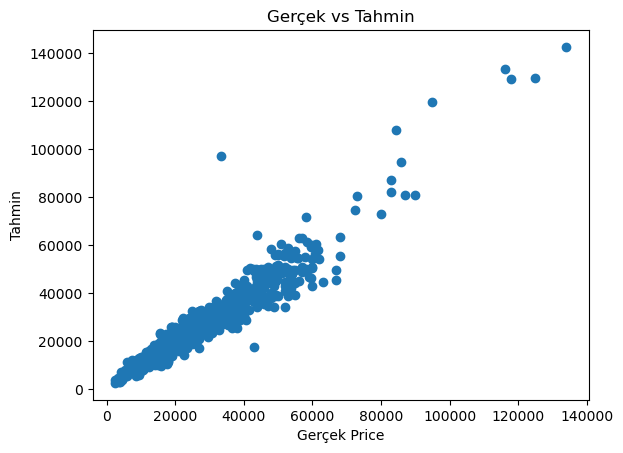

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y_test_real, y_pred)
plt.xlabel("Gerçek Price")
plt.ylabel("Tahmin")
plt.title("Gerçek vs Tahmin")
plt.show()


In [47]:
import numpy as np

y_pred_log = model.predict(x_test)
y_pred = np.exp(y_pred_log)      # log’u geri al


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [48]:
import pandas as pd

sonuc = pd.DataFrame({
    "Gerçek_Price": np.exp(y_test),
    "Tahmin_Price": y_pred.flatten()
})

sonuc.head()


,Gerçek_Price,Tahmin_Price
10442,9990.0,10100.591797
2907,22382.0,20878.972656
7388,28990.0,30447.148438
3016,30777.0,23207.876953
7890,14950.0,14746.761719
